In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    readHEPDataCsv,
    fromHB5Table1,
    read_csv_from_web,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `pp>H+tb>tb` [2001.07763](https://arxiv.org/abs/2001.07763)


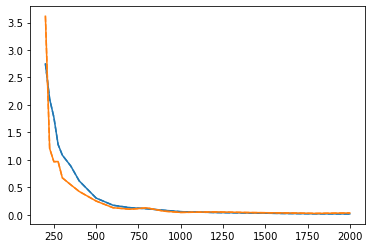

Looks good. Saving this to Hpmtb_LHC13_ATLAS_139.json


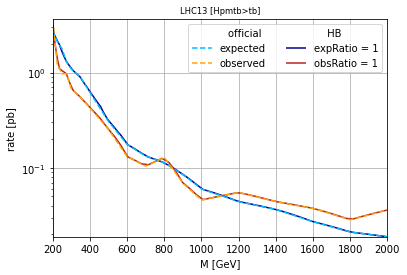

In [2]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1847643/95%25%20CL%20upper%20limit%20on%20XSEC%20times%20BR/1/csv"
)
df = dfs[0].rename(
    columns={"Mass [GeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]

limitFile = implementChannelLimit(
    "2102.10076",
    {"channels": [["Hpmtb", "tb"]]},
    "Fig. 6",
    df,
    massResolution=resolution.tb["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# ATLAS 8 TeV

## s-channel qq' > H+(tb) > tb (lepton + jets) [1512.03704](https://arxiv.org/abs/1512.03704)

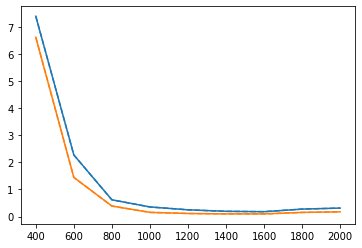

Looks good. Saving this to qqHpm_lep_LHC8_ATLAS_20.json


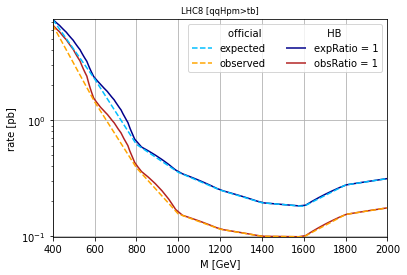

In [6]:
df = pd.DataFrame(
    data={
        "m": 1e3*np.arange(0.4, 2.2, 0.2),
        "obs": [
            6.6156,
            1.4446,
            0.38977,
            0.1558,
            0.11515,
            0.1,
            0.098997,
            0.15424,
            0.17582,
        ],
        "exp": [
            7.3911,
            2.2734,
            0.61962,
            0.35598,
            0.25018,
            0.19446,
            0.18122,
            0.2767,
            0.31416,
        ],
    }
)
limitFile = implementChannelLimit(
    1409300,
    {"channels": [["qqHpm", "tb"]]},
    "Fig. 10(a)",
    df,
    massResolution=resolution.tb["default"],
    prefix="qqHpm_lep",
    idSuffix=1,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## s-channel qq' > H+(tb) > tb (all hadron) [1512.03704](https://arxiv.org/abs/1512.03704)

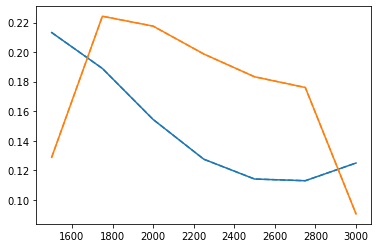

Looks good. Saving this to qqHpm_had_LHC8_ATLAS_20.json


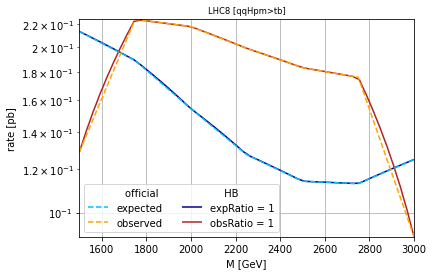

In [7]:
df = pd.DataFrame(
    data={
        "m": 1e3*np.concatenate([np.arange(1.5, 3.25, 0.25)]),
        "obs": [
            0.12872,
            0.22432,
            0.21763,
            0.19872,
            0.1833,
            0.17604,
            0.09039,
        ],
        "exp": [
            0.21328,
            0.18894,
            0.15438,
            0.12743,
            0.11403,
            0.11288,
            0.12488,
        ],
    }
)
limitFile = implementChannelLimit(
    1409300,
    {"channels": [["qqHpm", "tb"]]},
    "Fig. 10(b)",
    df,
    massResolution=resolution.tb["default"],
    collider="LHC8",
    prefix="qqHpm_had",
    idSuffix=2,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## gb > tH+ > tb [1512.03704](https://arxiv.org/abs/1512.03704)

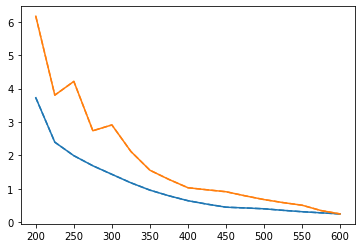

Looks good. Saving this to Hpmtb_LHC8_ATLAS_20.json


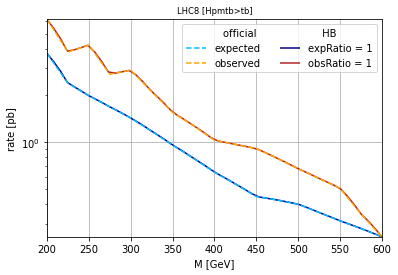

In [5]:
df = pd.DataFrame(
    data={
        "m": np.concatenate([np.arange(200, 625, 25)]),
        "obs": [
            6.1685,
            3.805,
            4.217,
            2.7384,
            2.9126,
            2.1178,
            1.5558,
            1.2798,
            1.0313,
            0.96963,
            0.91164,
            0.78944,
            0.67664,
            0.58595,
            0.50741,
            0.34688,
            0.24709,
        ],
        "exp": [
            3.7276,
            2.3959,
            1.9912,
            1.6892,
            1.433,
            1.1788,
            0.95972,
            0.78944,
            0.64274,
            0.53969,
            0.44852,
            0.42605,
            0.40057,
            0.35408,
            0.31299,
            0.27953,
            0.24709,
        ],
    }
)
limitFile = implementChannelLimit(
    1409300,
    {"channels": [["Hpmtb", "tb"]]},
    "Fig. 6",
    df,
    massResolution=resolution.tb["default"],
    collider="LHC8",
    idSuffix=3,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
